In [220]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("Data Folder/bigml_59c28831336c6604c800002a.csv", encoding='utf-8', index_col=0)
df


,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [221]:
# Check column names (features)
print("Column names:")
print(df.columns.tolist())

# Basic info about the dataset
print("\nDataset info:")
print(df.info())

# Shape of the dataset (rows, columns)
print(f"\nDataset shape: {df.shape}")

# First few rows
print("\nFirst 5 rows:")
print(df.head())

Column names:
['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   flo

In [222]:
features = ['account length', 'total day minutes', 'total day calls', 'total day charge',
           'total eve minutes', 'total eve calls', 'total eve charge',
           'total night minutes', 'total night calls', 'total night charge',
           'total intl minutes', 'total intl calls', 'total intl charge',
           'customer service calls', 'number vmail messages']


#Creating a Model Data Set and dropping missing values

In [223]:
# Convert churn to binary (1 for True, 0 for False)
df['churn_binary'] = df['churn'].astype(int)

# Handle missing values
df.dropna(inplace=True)

print(f"Dataset shape after cleaning: {df.shape}")
print(f"\nChurn distribution:")
print(df['churn'].value_counts())
print(f"Churn rate: {df['churn_binary'].mean():.3f}")

# Display first few rows
print(f"\nFirst 5 rows:")
print(df.head())

Dataset shape after cleaning: (3333, 21)

Churn distribution:
False    2850
True      483
Name: churn, dtype: int64
Churn rate: 0.145

First 5 rows:
       account length  area code phone number international plan  \
state                                                              
KS                128        415     382-4657                 no   
OH                107        415     371-7191                 no   
NJ                137        415     358-1921                 no   
OH                 84        408     375-9999                yes   
OK                 75        415     330-6626                yes   

      voice mail plan  number vmail messages  total day minutes  \
state                                                             
KS                yes                     25              265.1   
OH                yes                     26              161.6   
NJ                 no                      0              243.4   
OH                 no                  

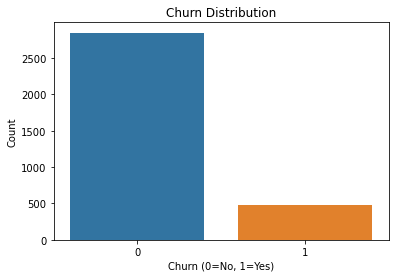

In [224]:
# Simple bar chart for churn data
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn_binary')
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

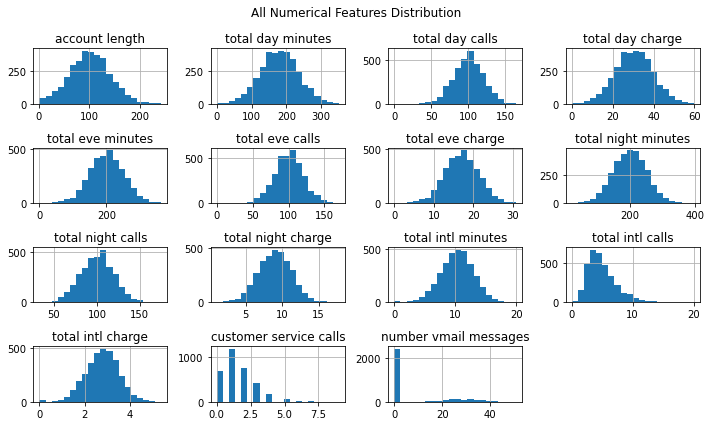

In [225]:
#All numerical features in one plot
df[features].hist(figsize=(10, 6), bins=20)
plt.suptitle('All Numerical Features Distribution')
plt.tight_layout()
plt.show()

In [226]:
# Standard Scaling (mean=0, std=1)
scaler = StandardScaler()
features = ['account length', 'total day minutes', 'total day calls', 'total day charge',
           'total eve minutes', 'total eve calls', 'total eve charge',
           'total night minutes', 'total night calls', 'total night charge',
           'total intl minutes', 'total intl calls', 'total intl charge',
           'customer service calls', 'number vmail messages']

df[features] = scaler.fit_transform(df[features])
print("Features standardized (mean=0, std=1)")

Features standardized (mean=0, std=1)


In [227]:
# CORRELATION ANALYSIS

print("\n" + "="*60)
print("FINDING BEST PREDICTOR FOR SIMPLE MODEL")
print("="*60)

# Calculate correlations with churn
correlations = df[features + ['churn_binary']].corr()['churn_binary'].sort_values(key=abs, ascending=False)

print("Feature correlations with churn (sorted by absolute value):")
for feature, corr in correlations.items():
    if feature != 'churn_binary':
        print(f"{feature:<25}: {corr:>8.4f}")

# Find the feature most correlated with churn
feature_corrs = correlations.drop('churn_binary')
best_feature = feature_corrs.abs().idxmax()
print(f"\nBest single predictor: {best_feature} (correlation: {feature_corrs[best_feature]:.4f})")



FINDING BEST PREDICTOR FOR SIMPLE MODEL
Feature correlations with churn (sorted by absolute value):
customer service calls   :   0.2087
total day minutes        :   0.2052
total day charge         :   0.2052
total eve minutes        :   0.0928
total eve charge         :   0.0928
number vmail messages    :  -0.0897
total intl charge        :   0.0683
total intl minutes       :   0.0682
total intl calls         :  -0.0528
total night charge       :   0.0355
total night minutes      :   0.0355
total day calls          :   0.0185
account length           :   0.0165
total eve calls          :   0.0092
total night calls        :   0.0061

Best single predictor: customer service calls (correlation: 0.2087)


In [228]:
# 1. SIMPLE LOGISTIC REGRESSION MODEL

print("\n" + "="*60)
print("1. BUILD SIMPLE LOGISTIC REGRESSION MODEL")
print("="*60)

print(f"Building simple logistic regression using '{best_feature}'")
print("The feature with highest correlation with churn will be used for simple logistic regression.")

# Prepare data for simple logistic regression
exog_simple = sm.add_constant(df[[best_feature]])
endog = df['churn_binary']

# Build simple logistic regression model
simple_model = sm.Logit(endog, exog_simple)
simple_model_results = simple_model.fit()

print(f"\nSimple Logistic Regression Results:")
print("="*50)
print(simple_model_results.summary())


1. BUILD SIMPLE LOGISTIC REGRESSION MODEL
Building simple logistic regression using 'customer service calls'
The feature with highest correlation with churn will be used for simple logistic regression.
Optimization terminated successfully.
         Current function value: 0.394125
         Iterations 6

Simple Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:           churn_binary   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Jul 2025   Pseudo R-squ.:                 0.04751
Time:                        11:59:34   Log-Likelihood:                -1313.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 2.404e-30
                          

In [229]:
 #INTERPRET SIMPLE MODEL METRICS

print("\n" + "="*60)
print("2. INTERPRET SIMPLE LOGISTIC REGRESSION METRICS")
print("="*60)

# Extract key metrics
pseudo_r_squared = simple_model_results.prsquared
log_likelihood = simple_model_results.llf
aic = simple_model_results.aic
model_p_value = simple_model_results.llr_pvalue
model_is_significant = model_p_value < 0.05

print("Model Performance Metrics:")
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared:.4f}")
print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"AIC: {aic:.2f}")
print(f"Model p-value (LLR test): {model_p_value:.2e}")
print(f"Model is statistically significant (α=0.05): {model_is_significant}")

# Calculate classification accuracy on training data
predictions_prob = simple_model_results.predict(exog_simple)
predictions_class = (predictions_prob > 0.5).astype(int)
accuracy = (predictions_class == df['churn_binary']).mean()
print(f"Training accuracy: {accuracy:.4f}")

# Store for comparison
r_squared_simple = pseudo_r_squared
model_significant_simple = model_is_significant



2. INTERPRET SIMPLE LOGISTIC REGRESSION METRICS
Model Performance Metrics:
Pseudo R-squared (McFadden): 0.0475
Log-Likelihood: -1313.62
AIC: 2631.24
Model p-value (LLR test): 2.40e-30
Model is statistically significant (α=0.05): True
Training accuracy: 0.8560


In [230]:
# 3. INTERPRET SIMPLE MODEL PARAMETERS

print("\n" + "="*60)
print("3. INTERPRET SIMPLE LOGISTIC REGRESSION PARAMETERS")
print("="*60)

# Extract coefficients
intercept = simple_model_results.params['const']
slope = simple_model_results.params[best_feature]

# Extract p-values
intercept_pvalue = simple_model_results.pvalues['const']
slope_pvalue = simple_model_results.pvalues[best_feature]

print("Model Parameters:")
print(f"Intercept (β₀): {intercept:.6f} (p-value: {intercept_pvalue:.4f})")
print(f"Slope (β₁): {slope:.6f} (p-value: {slope_pvalue:.4f})")

# Calculate odds ratio
odds_ratio = np.exp(slope)
print(f"\nOdds Ratio: {odds_ratio:.4f}")

print(f"\nModel equation: log(odds) = {intercept:.6f} + {slope:.6f} * {best_feature}")
print(f"Probability equation: P(churn=1) = 1 / (1 + exp(-({intercept:.6f} + {slope:.6f} * {best_feature})))")

print(f"\nInterpretation:")
print(f"- For every 1-unit increase in {best_feature}, the odds of churn multiply by {odds_ratio:.4f}")
if odds_ratio > 1:
    print(f"- Higher {best_feature} is associated with INCREASED churn probability")
else:
    print(f"- Higher {best_feature} is associated with DECREASED churn probability")

# Store parameters for later use
m = slope
b = intercept


3. INTERPRET SIMPLE LOGISTIC REGRESSION PARAMETERS
Model Parameters:
Intercept (β₀): -1.871009 (p-value: 0.0000)
Slope (β₁): 0.521079 (p-value: 0.0000)

Odds Ratio: 1.6838

Model equation: log(odds) = -1.871009 + 0.521079 * customer service calls
Probability equation: P(churn=1) = 1 / (1 + exp(-(-1.871009 + 0.521079 * customer service calls)))

Interpretation:
- For every 1-unit increase in customer service calls, the odds of churn multiply by 1.6838
- Higher customer service calls is associated with INCREASED churn probability


In [231]:
#4. MULTIPLE LOGISTIC REGRESSION MODEL


print("\n" + "="*60)
print("4. BUILD MULTIPLE LOGISTIC REGRESSION MODEL")
print("="*60)

print("Building logistic regression model with all available features:")
print(f"Features used: {features}")

# Prepare data for multiple logistic regression
exog_multiple = sm.add_constant(df[features])
endog = df['churn_binary']

# Build multiple logistic regression model
multiple_model = sm.Logit(endog, exog_multiple)
multiple_model_results = multiple_model.fit()

print(f"\nMultiple Logistic Regression Results:")
print("="*50)
print(multiple_model_results.summary())


4. BUILD MULTIPLE LOGISTIC REGRESSION MODEL
Building logistic regression model with all available features:
Features used: ['account length', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'number vmail messages']
Optimization terminated successfully.
         Current function value: 0.354288
         Iterations 9

Multiple Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:           churn_binary   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3317
Method:                           MLE   Df Model:                           15
Date:                Wed, 23 Jul 2025   Pseudo R-squ.:                  0.1438
Time:                

In [232]:
# 5. COMPARE MODELS AND INTERPRET RESULTS
# ================================

print("\n" + "="*60)
print("5. MULTIPLE REGRESSION MODEL INTERPRETATION")
print("="*60)

# Extract metrics for multiple model
pseudo_r_squared_multiple = multiple_model_results.prsquared
log_likelihood_multiple = multiple_model_results.llf
aic_multiple = multiple_model_results.aic

print("Model Comparison:")
print(f"Simple model Pseudo R²: {pseudo_r_squared:.4f}")
print(f"Multiple model Pseudo R²: {pseudo_r_squared_multiple:.4f}")
print(f"Improvement in Pseudo R²: {pseudo_r_squared_multiple - pseudo_r_squared:.4f}")

# Determine if second model is better
second_model_is_better = pseudo_r_squared_multiple > pseudo_r_squared
print(f"\nMultiple model is better than simple model: {second_model_is_better}")

# Classification accuracy for multiple model
predictions_prob_multiple = multiple_model_results.predict(exog_multiple)
predictions_class_multiple = (predictions_prob_multiple > 0.5).astype(int)
accuracy_multiple = (predictions_class_multiple == df['churn_binary']).mean()

print(f"\nModel Accuracy Comparison:")
print(f"Simple model accuracy: {accuracy:.4f}")
print(f"Multiple model accuracy: {accuracy_multiple:.4f}")


5. MULTIPLE REGRESSION MODEL INTERPRETATION
Model Comparison:
Simple model Pseudo R²: 0.0475
Multiple model Pseudo R²: 0.1438
Improvement in Pseudo R²: 0.0963

Multiple model is better than simple model: True

Model Accuracy Comparison:
Simple model accuracy: 0.8560
Multiple model accuracy: 0.8581


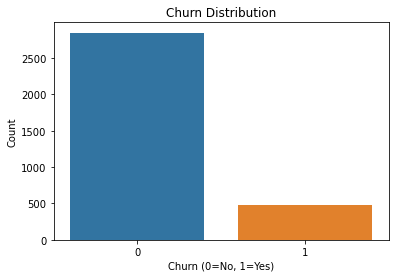

In [233]:
# Simple bar chart for churn data
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn_binary')
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [234]:
# FEATURE SIGNIFICANCE ANALYSIS


print(f"\n" + "="*60)
print("FEATURE SIGNIFICANCE ANALYSIS")
print("="*60)

print("Feature significance in multiple model (α=0.05):")
significant_features = []
non_significant_features = []

for param_name, p_value in multiple_model_results.pvalues.items():
    if param_name != 'const':
        significant = p_value < 0.05
        status = '✓ Significant' if significant else '✗ Not significant'
        print(f"{param_name:<25}: p={p_value:.4f} {status}")
        
        if significant:
            significant_features.append(param_name)
        else:
            non_significant_features.append(param_name)

print(f"\nSignificant features ({len(significant_features)}): {significant_features}")
print(f"Non-significant features ({len(non_significant_features)}): {non_significant_features}")

# Find the most non-significant feature
if non_significant_features:
    most_non_significant = max(non_significant_features, 
                              key=lambda x: multiple_model_results.pvalues[x])
    not_significant = most_non_significant
    print(f"Most non-significant feature: {not_significant} (p={multiple_model_results.pvalues[not_significant]:.4f})")
else:
    not_significant = None
    print("All features are statistically significant!")


FEATURE SIGNIFICANCE ANALYSIS
Feature significance in multiple model (α=0.05):
account length           : p=0.2894 ✗ Not significant
total day minutes        : p=0.8423 ✗ Not significant
total day calls          : p=0.2718 ✗ Not significant
total day charge         : p=0.8392 ✗ Not significant
total eve minutes        : p=0.7878 ✗ Not significant
total eve calls          : p=0.7403 ✗ Not significant
total eve charge         : p=0.7910 ✗ Not significant
total night minutes      : p=0.9886 ✗ Not significant
total night calls        : p=0.7246 ✗ Not significant
total night charge       : p=0.9912 ✗ Not significant
total intl minutes       : p=0.7744 ✗ Not significant
total intl calls         : p=0.0008 ✓ Significant
total intl charge        : p=0.7603 ✗ Not significant
customer service calls   : p=0.0000 ✓ Significant
number vmail messages    : p=0.0000 ✓ Significant

Significant features (3): ['total intl calls', 'customer service calls', 'number vmail messages']
Non-significant feature

In [235]:
# ODDS RATIOS AND PRACTICAL INTERPRETATION


print(f"\n" + "="*60)
print("ODDS RATIOS AND PRACTICAL INTERPRETATION")
print("="*60)

print("Odds ratios for significant features (Multiple Model):")
for param_name, coeff in multiple_model_results.params.items():
    if param_name != 'const' and param_name in significant_features:
        odds_ratio = np.exp(coeff)
        p_value = multiple_model_results.pvalues[param_name]
        
        if odds_ratio > 1:
            interpretation = f"increases churn odds by {((odds_ratio-1)*100):.1f}%"
        else:
            interpretation = f"decreases churn odds by {((1-odds_ratio)*100):.1f}%"
        
        print(f"{param_name:<25}: OR={odds_ratio:.4f} (p={p_value:.4f}) - {interpretation}")



ODDS RATIOS AND PRACTICAL INTERPRETATION
Odds ratios for significant features (Multiple Model):
total intl calls         : OR=0.8212 (p=0.0008) - decreases churn odds by 17.9%
customer service calls   : OR=1.8193 (p=0.0000) - increases churn odds by 81.9%
number vmail messages    : OR=0.7140 (p=0.0000) - decreases churn odds by 28.6%


In [236]:
# MODEL PREDICTIONS EXAMPLES

print(f"\n" + "="*60)
print("MODEL PREDICTIONS EXAMPLES")
print("="*60)

# Show some prediction examples
sample_indices = [0, 1, 2, 100, 200]
print("Sample predictions (first few customers):")
print(f"{'Index':<8}{'Actual':<8}{'Simple_Prob':<12}{'Multiple_Prob':<14}{'Simple_Pred':<12}{'Multiple_Pred'}")
print("-" * 70)

for idx in sample_indices:
    if idx < len(df):
        actual = df.iloc[idx]['churn_binary']
        simple_prob = predictions_prob.iloc[idx]
        multiple_prob = predictions_prob_multiple.iloc[idx]
        simple_pred = int(simple_prob > 0.5)
        multiple_pred = int(multiple_prob > 0.5)
        
        print(f"{idx:<8}{actual:<8}{simple_prob:<12.4f}{multiple_prob:<14.4f}{simple_pred:<12}{multiple_pred}")



MODEL PREDICTIONS EXAMPLES
Sample predictions (first few customers):
Index   Actual  Simple_Prob Multiple_Prob Simple_Pred Multiple_Pred
----------------------------------------------------------------------
0       0       0.1097      0.1853        0           0
1       0       0.1097      0.0790        0           0
2       0       0.0766      0.0955        0           0
100     0       0.2879      0.1010        0           0
200     0       0.2139      0.1544        0           0


In [237]:
# SUMMARY VARIABLES FOR TESTING

print(f"\n" + "="*60)
print("SUMMARY OF KEY RESULTS")
print("="*60)

print("Key Variables for Analysis:")
print(f"r_squared (simple model): {r_squared_simple:.4f}")
print(f"model_is_significant: {model_significant_simple}")
print(f"m (slope): {m:.6f}")
print(f"b (intercept): {b:.6f}")
print(f"second_model_is_better: {second_model_is_better}")
if not_significant:
    print(f"not_significant feature: {not_significant}")
else:
    print(f"not_significant feature: None (all features significant)")

print(f"\nModel Performance Summary:")
print(f"- Simple logistic regression Pseudo R²: {r_squared_simple:.4f}")
print(f"- Multiple logistic regression Pseudo R²: {pseudo_r_squared_multiple:.4f}")
print(f"- Best single predictor: {best_feature}")
print(f"- Number of significant features: {len(significant_features)}")
print(f"- Training accuracy improvement: {accuracy_multiple - accuracy:.4f}")

print(f"\nBusiness Insights:")
print(f"- Churn rate in dataset: {df['churn_binary'].mean():.1%}")
print(f"- Most predictive feature: {best_feature}")
print(f"- Multiple model explains {pseudo_r_squared_multiple:.1%} of deviance in churn")





SUMMARY OF KEY RESULTS
Key Variables for Analysis:
r_squared (simple model): 0.0475
model_is_significant: True
m (slope): 0.521079
b (intercept): -1.871009
second_model_is_better: True
not_significant feature: total night charge

Model Performance Summary:
- Simple logistic regression Pseudo R²: 0.0475
- Multiple logistic regression Pseudo R²: 0.1438
- Best single predictor: customer service calls
- Number of significant features: 3
- Training accuracy improvement: 0.0021

Business Insights:
- Churn rate in dataset: 14.5%
- Most predictive feature: customer service calls
- Multiple model explains 14.4% of deviance in churn


In [238]:
# Final verification
print(f"\n" + "="*60)
print("MODEL VERIFICATION")
print("="*60)

print("Simple model verification:")
print(f"- Model type: {type(simple_model)}")
print(f"- Number of features: {simple_model.df_model}")
print(f"- Sample size: {simple_model}")

print(f"\nMultiple model verification:")
print(f"- Model type: {type(multiple_model)}")
print(f"- Number of features: {multiple_model.df_model}")
print(f"- Sample size: {multiple_model}")

print(f"\nAnalysis complete!")
print(f"Use these models to predict customer churn and identify at-risk customers.")


MODEL VERIFICATION
Simple model verification:
- Model type: <class 'statsmodels.discrete.discrete_model.Logit'>
- Number of features: 1.0
- Sample size: <statsmodels.discrete.discrete_model.Logit object at 0x000001C500255820>

Multiple model verification:
- Model type: <class 'statsmodels.discrete.discrete_model.Logit'>
- Number of features: 15.0
- Sample size: <statsmodels.discrete.discrete_model.Logit object at 0x000001C500D05700>

Analysis complete!
Use these models to predict customer churn and identify at-risk customers.


# Customer Churn Prediction - Decision Tree Analysis

**Business Question:** Can we predict which telecom customers will churn?

**Why Decision Trees:** Simple, interpretable rules that business teams can act on.

In [239]:
# Importing Libraries

print("TELECOM CHURN PREDICTION - DECISION TREE")
print("="*50)

TELECOM CHURN PREDICTION - DECISION TREE


In [240]:
# Load data and select key features
df = pd.read_csv("Data Folder/bigml_59c28831336c6604c800002a.csv")

features = ['account length', 'total day minutes', 'total day calls', 'total day charge',
           'total eve minutes', 'total eve calls', 'total eve charge',
           'total night minutes', 'total night calls', 'total night charge',
           'total intl minutes', 'total intl calls', 'total intl charge',
           'customer service calls', 'number vmail messages']

df_clean = df[features + ['churn']].dropna()
df_clean['churn_binary'] = df_clean['churn'].astype(int)

print(f"Dataset: {df_clean.shape[0]:,} customers")
print(f"Churn rate: {df_clean['churn_binary'].mean():.1%}")

Dataset: 3,333 customers
Churn rate: 14.5%


In [241]:
# 2. TRAIN DECISION TREE

# Split data
X = df_clean[features]
y = df_clean['churn_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train decision tree
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)
dt_model.fit(X_train, y_train)

print(f"\nDecision Tree: {dt_model.get_depth()} levels, {dt_model.get_n_leaves()} leaves")



Decision Tree: 4 levels, 10 leaves


In [242]:
# 3. MODEL PERFORMANCE

# Evaluate performance
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"\nPerformance:")
print(f"Training Accuracy: {train_acc:.1%}")
print(f"Test Accuracy: {test_acc:.1%}")
print(f"\nClassification Report:")
print(classification_report(y_test, test_pred, target_names=['Retained', 'Churned']))


Performance:
Training Accuracy: 90.5%
Test Accuracy: 88.0%

Classification Report:
              precision    recall  f1-score   support

    Retained       0.92      0.94      0.93       570
     Churned       0.60      0.53      0.56        97

    accuracy                           0.88       667
   macro avg       0.76      0.73      0.75       667
weighted avg       0.87      0.88      0.88       667



In [243]:
#4. FEATURE IMPORTANCE

importance_df = pd.DataFrame({
    'feature': features,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop Churn Predictors:")
for _, row in importance_df.head().iterrows():
    print(f"{row['feature']:<25}: {row['importance']:.3f}")

top_feature = importance_df.iloc[0]['feature']


Top Churn Predictors:
total day minutes        : 0.471
customer service calls   : 0.294
total eve minutes        : 0.140
total day charge         : 0.054
total eve charge         : 0.027


In [244]:
# 5. DECISION RULES

print(f"\nDecision Rules (Key Patterns):")
tree_rules = export_text(dt_model, feature_names=features, max_depth=3)
print(tree_rules)


Decision Rules (Key Patterns):
|--- total day minutes <= 264.45
|   |--- customer service calls <= 3.50
|   |   |--- total day charge <= 37.72
|   |   |   |--- total intl charge <= 3.55
|   |   |   |   |--- class: 0
|   |   |   |--- total intl charge >  3.55
|   |   |   |   |--- class: 0
|   |   |--- total day charge >  37.72
|   |   |   |--- total eve minutes <= 241.25
|   |   |   |   |--- class: 0
|   |   |   |--- total eve minutes >  241.25
|   |   |   |   |--- class: 1
|   |--- customer service calls >  3.50
|   |   |--- total day minutes <= 160.20
|   |   |   |--- class: 1
|   |   |--- total day minutes >  160.20
|   |   |   |--- total eve charge <= 16.37
|   |   |   |   |--- class: 0
|   |   |   |--- total eve charge >  16.37
|   |   |   |   |--- class: 0
|--- total day minutes >  264.45
|   |--- total eve minutes <= 185.45
|   |   |--- class: 0
|   |--- total eve minutes >  185.45
|   |   |--- total eve charge <= 19.13
|   |   |   |--- class: 1
|   |   |--- total eve charge >  

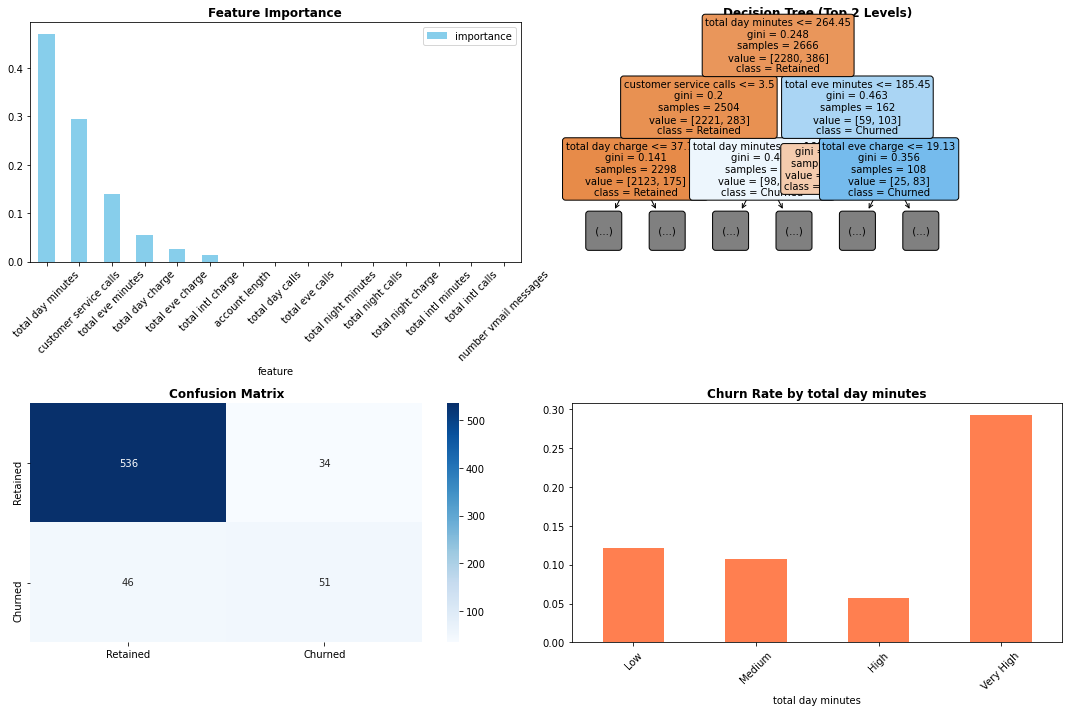

In [245]:
# 6. VISUALIZATIONS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Feature importance
importance_df.plot(x='feature', y='importance', kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Feature Importance', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# Decision tree
plot_tree(dt_model, feature_names=features, class_names=['Retained', 'Churned'],
          filled=True, rounded=True, fontsize=10, max_depth=2, ax=axes[0,1])
axes[0,1].set_title('Decision Tree (Top 2 Levels)', fontweight='bold')

# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
            xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
axes[1,0].set_title('Confusion Matrix', fontweight='bold')

# Churn by top feature
bins = pd.qcut(df_clean[top_feature], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
churn_rates = df_clean.groupby(bins)['churn_binary'].mean()
churn_rates.plot(kind='bar', ax=axes[1,1], color='coral')
axes[1,1].set_title(f'Churn Rate by {top_feature}', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [246]:

# 7. MODEL COMPARISON

# Compare with logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)

print(f"\nModel Comparison:")
print(f"Decision Tree:        {test_acc:.1%}")
print(f"Logistic Regression:  {lr_acc:.1%}")
print(f"Winner: {'Decision Tree' if test_acc > lr_acc else 'Logistic Regression'}")


Model Comparison:
Decision Tree:        88.0%
Logistic Regression:  84.7%
Winner: Decision Tree


In [247]:
#8. BUSINESS INSIGHTS

# Risk segmentation
pred_proba = dt_model.predict_proba(X)[:, 1]
df_clean['risk_level'] = pd.cut(pred_proba, bins=[0, 0.3, 0.6, 1.0], 
                               labels=['Low Risk', 'Medium Risk', 'High Risk'])

risk_summary = df_clean.groupby('risk_level').agg({
    'churn_binary': ['count', 'sum', 'mean']
}).round(3)

print(f"\nCustomer Risk Segmentation:")
print(risk_summary)

print(f"\nBUSINESS RECOMMENDATIONS:")
print(f"✓ Primary churn driver: {top_feature}")
print(f"✓ Model accuracy: {test_acc:.1%}")
print(f"✓ {df_clean['risk_level'].value_counts()['High Risk']:,} customers at high risk")
print(f"✓ Focus retention efforts on high {top_feature} customers")

print(f"\nANSWER: YES, there are predictable churn patterns!")
print(f"Decision tree found clear rules with {test_acc:.1%} accuracy.")



Customer Risk Segmentation:
            churn_binary            
                   count  sum   mean
risk_level                          
Low Risk            2854  183  0.064
Medium Risk          234  107  0.457
High Risk            245  193  0.788

BUSINESS RECOMMENDATIONS:
✓ Primary churn driver: total day minutes
✓ Model accuracy: 88.0%
✓ 245 customers at high risk
✓ Focus retention efforts on high total day minutes customers

ANSWER: YES, there are predictable churn patterns!
Decision tree found clear rules with 88.0% accuracy.
